# Italy Covid19 Analysis

Import Requried modules

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [10]:
data=pd.read_csv('covid.csv', header=0, index_col='date', parse_dates=True)

In [11]:
data.head(3)

,Unnamed: 0,state,hospitalized_with_symptoms,intensive_care,total_hospitalized,home_quarantine,total_confirmed_cases,new_confirmed_cases,recovered,deaths,total_cases,swabs_made,note_it,note_en
date,,,,,,,,,,,,,,
2020-02-24 18:00:00,0,ITA,101,26,127,94,221,221,1,7,229,4324,NaN,NaN
2020-02-25 18:00:00,1,ITA,114,35,150,162,311,90,1,10,322,8623,NaN,NaN
2020-02-26 18:00:00,2,ITA,128,36,164,221,385,74,3,12,400,9587,NaN,NaN


In [12]:
data.tail(3)

,Unnamed: 0,state,hospitalized_with_symptoms,intensive_care,total_hospitalized,home_quarantine,total_confirmed_cases,new_confirmed_cases,recovered,deaths,total_cases,swabs_made,note_it,note_en
date,,,,,,,,,,,,,,
2020-03-27 17:00:00,32,ITA,26029,3732,29761,36653,66414,4401,10950,9134,86498,394079,NaN,NaN
2020-03-28 17:00:00,33,ITA,26676,3856,30532,39533,70065,3651,12384,10023,92472,429526,NaN,NaN
2020-03-29 17:00:00,34,ITA,27386,3906,31292,42588,73880,3815,13030,10779,97689,454030,pd-IT-0009,pd-EN-0009


In [13]:
data.shape

(35, 14)

In [14]:
data.describe()

,Unnamed: 0,hospitalized_with_symptoms,intensive_care,total_hospitalized,home_quarantine,total_confirmed_cases,new_confirmed_cases,recovered,deaths,total_cases,swabs_made
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,17.000000,9742.600000,1539.228571,11281.857143,11466.942857,22748.771429,2110.857143,3341.657143,2646.942857,28737.371429,137260.485714
std,10.246951,9320.218169,1364.064581,10680.802798,13293.109179,23848.957586,1637.750414,4034.089386,3306.511730,31140.590349,134884.899167
min,0.000000,101.000000,26.000000,127.000000,94.000000,221.000000,74.000000,1.000000,7.000000,229.000000,4324.000000
25%,8.500000,1190.000000,262.000000,1452.000000,1030.000000,2484.500000,485.500000,218.000000,93.000000,2795.500000,27846.500000
50%,17.000000,6650.000000,1153.000000,7803.000000,5036.000000,12839.000000,2116.000000,1258.000000,1016.000000,15113.000000,86011.000000
75%,25.500000,16864.000000,2756.000000,19620.000000,20650.500000,40270.500000,3631.500000,5600.500000,4428.500000,50299.500000,220054.000000
max,34.000000,27386.000000,3906.000000,31292.000000,42588.000000,73880.000000,4821.000000,13030.000000,10779.000000,97689.000000,454030.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 2020-02-24 18:00:00 to 2020-03-29 17:00:00
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  35 non-null     int64 
 1   state                       35 non-null     object
 2   hospitalized_with_symptoms  35 non-null     int64 
 3   intensive_care              35 non-null     int64 
 4   total_hospitalized          35 non-null     int64 
 5   home_quarantine             35 non-null     int64 
 6   total_confirmed_cases       35 non-null     int64 
 7   new_confirmed_cases         35 non-null     int64 
 8   recovered                   35 non-null     int64 
 9   deaths                      35 non-null     int64 
 10  total_cases                 35 non-null     int64 
 11  swabs_made                  35 non-null     int64 
 12  note_it                     8 non-null      object
 13  note_en       

In [16]:
data.isnull().sum()

Unnamed: 0                     0
state                          0
hospitalized_with_symptoms     0
intensive_care                 0
total_hospitalized             0
home_quarantine                0
total_confirmed_cases          0
new_confirmed_cases            0
recovered                      0
deaths                         0
total_cases                    0
swabs_made                     0
note_it                       27
note_en                       27
dtype: int64

In [19]:
null_data=data['note_it']
null_data.tail(3)
null_data.fillna(0,inplace=True)
null_data.head()

date
2020-02-24 18:00:00    0
2020-02-25 18:00:00    0
2020-02-26 18:00:00    0
2020-02-27 18:00:00    0
2020-02-28 18:00:00    0
Name: note_it, dtype: object

In [20]:
data.isnull().sum()

Unnamed: 0                     0
state                          0
hospitalized_with_symptoms     0
intensive_care                 0
total_hospitalized             0
home_quarantine                0
total_confirmed_cases          0
new_confirmed_cases            0
recovered                      0
deaths                         0
total_cases                    0
swabs_made                     0
note_it                        0
note_en                       27
dtype: int64

In [21]:
null_values=data['note_en']
null_values.fillna(0,inplace=True)
data.isnull().sum()

Unnamed: 0                    0
state                         0
hospitalized_with_symptoms    0
intensive_care                0
total_hospitalized            0
home_quarantine               0
total_confirmed_cases         0
new_confirmed_cases           0
recovered                     0
deaths                        0
total_cases                   0
swabs_made                    0
note_it                       0
note_en                       0
dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 2020-02-24 18:00:00 to 2020-03-29 17:00:00
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  35 non-null     int64 
 1   state                       35 non-null     object
 2   hospitalized_with_symptoms  35 non-null     int64 
 3   intensive_care              35 non-null     int64 
 4   total_hospitalized          35 non-null     int64 
 5   home_quarantine             35 non-null     int64 
 6   total_confirmed_cases       35 non-null     int64 
 7   new_confirmed_cases         35 non-null     int64 
 8   recovered                   35 non-null     int64 
 9   deaths                      35 non-null     int64 
 10  total_cases                 35 non-null     int64 
 11  swabs_made                  35 non-null     int64 
 12  note_it                     35 non-null     object
 13  note_en       

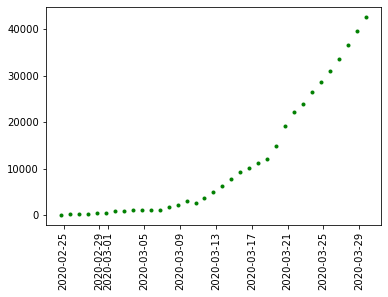

In [34]:
plt.plot(data['home_quarantine'],'.',color='g')
plt.xticks(rotation=90)
plt.show()

In [36]:
data.columns

Index(['Unnamed: 0', 'state', 'hospitalized_with_symptoms', 'intensive_care',
       'total_hospitalized', 'home_quarantine', 'total_confirmed_cases',
       'new_confirmed_cases', 'recovered', 'deaths', 'total_cases',
       'swabs_made', 'note_it', 'note_en'],
      dtype='object')

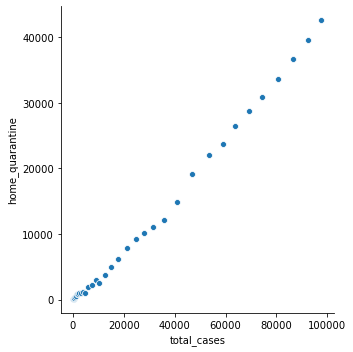

In [39]:
import seaborn as sns
sns.relplot(x='total_cases',y='home_quarantine',data=data);


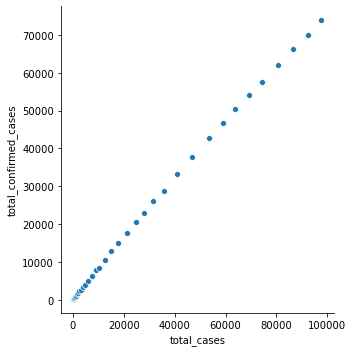

In [41]:
sns.relplot(x='total_cases',y='total_confirmed_cases',data=data);

In [59]:
total_cases=data.groupby('total_cases').mean()
x=total_cases['total_hospitalized']
y=total_cases['intensive_care'].agg(np.mean)
z=total_cases['total_confirmed_cases'].agg(np.mean)
w=total_cases['recovered'].agg(np.mean)
total_cases

,Unnamed: 0,hospitalized_with_symptoms,intensive_care,total_hospitalized,home_quarantine,total_confirmed_cases,new_confirmed_cases,recovered,deaths,swabs_made
total_cases,,,,,,,,,,
229,0,101,26,127,94,221,221,1,7,4324
322,1,114,35,150,162,311,90,1,10,8623
400,2,128,36,164,221,385,74,3,12,9587
650,3,248,56,304,284,588,203,45,17,12014
888,4,345,64,409,412,821,233,46,21,15695
1128,5,401,105,506,543,1049,228,50,29,18661
1694,6,639,140,779,798,1577,528,83,34,21127
2036,7,742,166,908,927,1835,258,149,52,23345
2502,8,1034,229,1263,1000,2263,428,160,79,25856


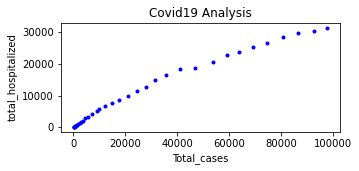

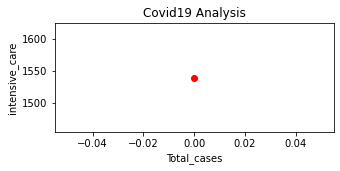

In [60]:
plt.figure(figsize=(5,2))
plt.plot(x,'.',color='b')
plt.title('Covid19 Analysis')
plt.xlabel('Total_cases')
plt.ylabel('total_hospitalized')
plt.show()

plt.figure(figsize=(5,2))
plt.plot(y,'o',color='r')
plt.title('Covid19 Analysis')
plt.xlabel('Total_cases')
plt.ylabel('intensive_care')
plt.show()

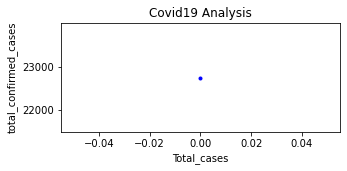

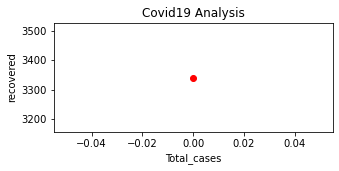

In [57]:
plt.figure(figsize=(5,2))
plt.plot(z,'.',color='b')
plt.title('Covid19 Analysis')
plt.xlabel('Total_cases')
plt.ylabel('total_confirmed_cases')
plt.show()

plt.figure(figsize=(5,2))
plt.plot(w,'o',color='r')
plt.title('Covid19 Analysis')
plt.xlabel('Total_cases')
plt.ylabel('recovered')
plt.show()
